*Author: Szymon Sarnowicz (University of Michigan)*

## 1. Visualization technique

<font color=purple>***I plan on using the following visualization techniques:***</font><br>
-> Simple Lineplot<br>
-> Swarmplot<br>
-> Boxplot<br>

<font color=purple> --Details about this technique:  </font><br>
All the data you will below is indexed to a timeseries. Therefore the plan is see any major trends with home prices versus time. A *lineplot* is one of the best go-to methods for visualizing data over time. To make it more interesting I will bucket different categories to see if certain catergories affect overall price, as well as being able to see it over time.<br>

However, line plots are not good visualizations for mean, standard deviation, and so on. Therefore, the two other plots I would like to explore here is the swarmplot and the boxplot. Both provide a great way to group data and understand how the data lies. Is it spread out? Are there outliars? Is the mean offset to the top 25%? Both swarm and box plot can provide that detail quite easily.<br>

The disadvantage of swarm and box plots is that they no longer provide time data, but the advantages I already spoke of. In order to get time info from swarm or box we'll need to reference back to the lineplots.

## 2. Visualization library

<font color=purple>***Seaborn Library Background***</font><br>
The library I am planning on using is called "seaborn: statistical data visualization". It is a Python visualization tool based on matplotlib. Due to being a package off of matplotlib (with simple pandas integration) it allows ease of use just like matplotlib with a plethora of default visualization tools that make sharing and understanding data not only faster but also more satisfying. And to be honest, I really like the color palets they provide. <br>

I chose this library because it is one of the *simpler* visualization libraries out there and integrates very well with Jupyter. As I am new to data science I wanted an option that let me dive right in as long as I had some familiarity with data manipulation. Another reason I like this library is because it is *declarive*, which means a lot of the background transactions are taken care of for me. However, that comes with limitations, which you will see later. Specifying, how I want my data to be grouped or working with the datetime object, I found difficult. For that reason, a bit more up front data manipulation is required.

Seaborn is credited to Michael Waskom, and is open source (you can read more about it here: https://github.com/mwaskom/seaborn).<br>

<font color=purple>***--To install--***</font><br>
Go to the command line and type (supports Python 3.7+): <br>
$ pip install seaborn

## 3. Demonstration

The data I chose is a build up off a previous class I took at the Unveristy of Michigan. In *SIADS 601: Qualitative Inquiry for Data Scientists* we were asked to interview candidates and make qualitative deductions off of those interviews surrounding a given dataset. However, the class ended there and we were unable to dive deeper into actual visualizing the *quantitative* data. For that reason, I am curious to do that here.<br>

The dataset I chose can be found at (https://www.kaggle.com/datasets/arathipraj/house-data?resource=download) which provides a dataset of home prices from King County Washington (where I grew up!) from May 2014 to May 2015. It provides date sold with price along with a number of typical columns of information like sqft, beds, baths, grade, condition, year renovated, etc...<br>

I am going to pick both <font color=purple>grade</font> (*An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design*) and <font color=purple>waterfront</font> (*either 0 or 1*) to see what trends there are related to sale date and sale price.

In [1]:
# (IGNORE IF WORKING IN JUPYTER WEB ENVIRONMENT)
# Before we start, make sure you have all python libraries installed. To start a new python environment open up a terminal in whatever folder you are in:
    # python -m venv [your chose of session name here]

# Then enter the following to active your environment
    # [your chose of session name here]\Scripts\activate

# Once this is done make sure your kernel matches your active session
# One unique library you may need is opendatasets, in order to download directly from kaggle. Here's how:
    # python.exe -m pip install opendatasets

In [2]:
# Now let's import libraries
import warnings
import matplotlib.pyplot as plt
import os
import opendatasets as od
import re
import pandas as pd
import seaborn as sns
import numpy as np

<font color=purple>***--Data download and clean up--***</font><br>
Now to get to the heart of things, download the dataset as a *.csv* from the kaggle link and save it where ever you prefer. You can use the opendatasets library to download directly from the kaggle site. You will need to provide your credentials via your created token, which is explained here: http://bit.ly/kaggle-creds . We will use pandas *.read_csv()* method to get the data into a working dataframe.

In [3]:
URL = 'https://www.kaggle.com/datasets/arathipraj/house-data/download?datasetVersionNumber=1'

In [4]:
def get_house_data(filepath='house-data/house_data.csv', url=URL) -> pd.DataFrame:
    
    # only download data if not already in directory
    if not os.path.exists(filepath):
        od.download(URL)
        
    # to keep the data clean let's name our columns as such
    col_names = ['id',
                 'date',
                 'price',
                 'bedrooms',
                 'bathrooms',
                 'sqft_living',
                 'sqft_lot',
                 'floors',
                 'waterfront',
                 'view',
                 'condition',
                 'grade',
                 'sqft_above',
                 'sqft_basement',
                 'yr_built',
                 'yr_renovated',
                 'zipcode',
                 'lat',
                 'long',
                 'sqft_living_nearest_15',
                 'sqft_lot_2015_nearest_15']
        
    # read csv to pandas dataframe with column names above
    df = pd.read_csv(filepath_or_buffer=filepath, header=0, names=col_names)
    
    return df

In [5]:
def clean_house_data() -> pd.DataFrame:
    # this is where we will load and clean our data
    
    # get house data
    df = get_house_data()
    
    # in order to clean up the dates I find it easiest to use regex to get just the date before we
    # convert it to the datetime object
    df['date'] = df['date'].apply(lambda x: re.sub('(?P<dates>[w0-9]+)(?P<time>[T][0]+)','\g<dates>', x))
    df['date']= pd.to_datetime(df['date'])
    
    # set index to date to make using our visualization tools a bit easier later on (means we won't have to specify index)
    df = df.set_index('date')
    
    return df

In [6]:
# later on I'd like to group by month of sale, so that the data is a bit easier to see. 
# just so we have something to reference in the tables, let's add a month column
# later on I found a much easier .Grouper() method from pandas, but I still found
# it helpful to have the months listed when looking at the tables and could still be
# useful in future cases
def create_month_of_sale_col(df) -> pd.DataFrame:
    #sort the data by date
    df.sort_index(inplace=True)
    
    # create the month column from the date column
    df['month'] = df.index.month
    
    # map to 3-letter month abreviation
    month_map = {1:'Jan',
                 2:'Feb',
                 3:'Mar',
                 4:'Apr',
                 5:'May',
                 6:'Jun',
                 7:'Jul',
                 8:'Aug',
                 9:'Sep',
                 10:'Oct',
                 11:'Nov',
                 12:'Dec'}
    
    df.replace({'month':month_map}, inplace=True)
    
    return df

In [7]:
# let's just take a look at some of the data so we understand what we're working with
home_sales_df = create_month_of_sale_col(clean_house_data())
home_sales_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_nearest_15,sqft_lot_2015_nearest_15,month
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,5561000190,437500,3,2.25,1970,35100,2.0,0,0,4,...,1970,0,1977,0,98027,47.4635,-121.991,2340,35100,May
2014-05-02,472000620,790000,3,2.50,2600,4750,1.0,0,0,4,...,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,May
2014-05-02,1024069009,675000,5,2.50,2820,67518,2.0,0,0,3,...,2820,0,1979,0,98029,47.5794,-122.025,2820,48351,May
2014-05-02,7853361370,555000,4,2.50,3310,6500,2.0,0,0,3,...,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,May
2014-05-02,5056500260,440000,4,2.25,2160,8119,1.0,0,0,3,...,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000,May


In [8]:
# Now, what I am really interested in seeing is how the home grade value (scale 1-13, larger being of higher quality),
# correlates to sale price. If you've done any data manipulation in pandas you'll be familiar with groupby(). 
# In this case I would like to groupby month of sale for each grade value. pd.Grouper() has a very useful method
# to group by month using freq='M'. 

def get_mean_per_month(df, col_name):
    for col in range(np.min(df[col_name]), np.max(df[col_name])+1):
        if col in df[col_name].unique():
            
            # group by month for given column name
            f = df[df[col_name] == col].groupby(pd.Grouper(freq='M'))['price'].mean()
            
            # create dataframe from grouped data
            d = {'months':f.index, '{0} {1}'.format(col_name, col):f.values}
            mean_ts = pd.DataFrame(data=d)
            mean_ts.set_index('months', inplace=True)
            
            # merge dataframes
            if col == (np.min(df[col_name])):
                mean_price_comb = mean_ts
            else:
                mean_price_comb = mean_price_comb.merge(mean_ts, on='months', how='outer')
                
    return mean_price_comb

Now let's actually look at the data. For this example I am going to view the data with a simple line plot. Seaborn does an excellent job showing the grades and adding unique colors. 

In [18]:
def create_line_graph(data):
    # close any open charts
    plt.close('all')
    
    # I prefer this white grid background to make the lines easier to see
    sns.set_style("whitegrid")
    
    # actual plot using the standard plotting method from Seaborn -> ,relplot
    # use kind = 'line' to get a lineplot
    g = sns.relplot(data=data,kind='line',marker='o',markersize=5)
    
    # adjust figure sizing
    g.fig.set_figwidth(10)
    g.fig.set_figheight(8)
    g.fig.tight_layout(pad=1.3)
    
    # adjust legend
    sns.move_legend(g, "upper left",bbox_to_anchor=(1, 1))
    
    # create labels
    g.set_xticklabels(rotation=45)
    plt.xlabel('May 2014 to May 2015',labelpad=7)
    plt.ylabel('average sale price [millions]',labelpad=7)
    
    if 'grade' in list(data.columns)[1]:
        plt.title('Average King County Home Sale Price By Grade', fontsize=14, y=1.05)
    else:
        plt.title('Average King County Home Sale Price For Waterfront', fontsize=14, y=1.05)
    
    return plt.show()

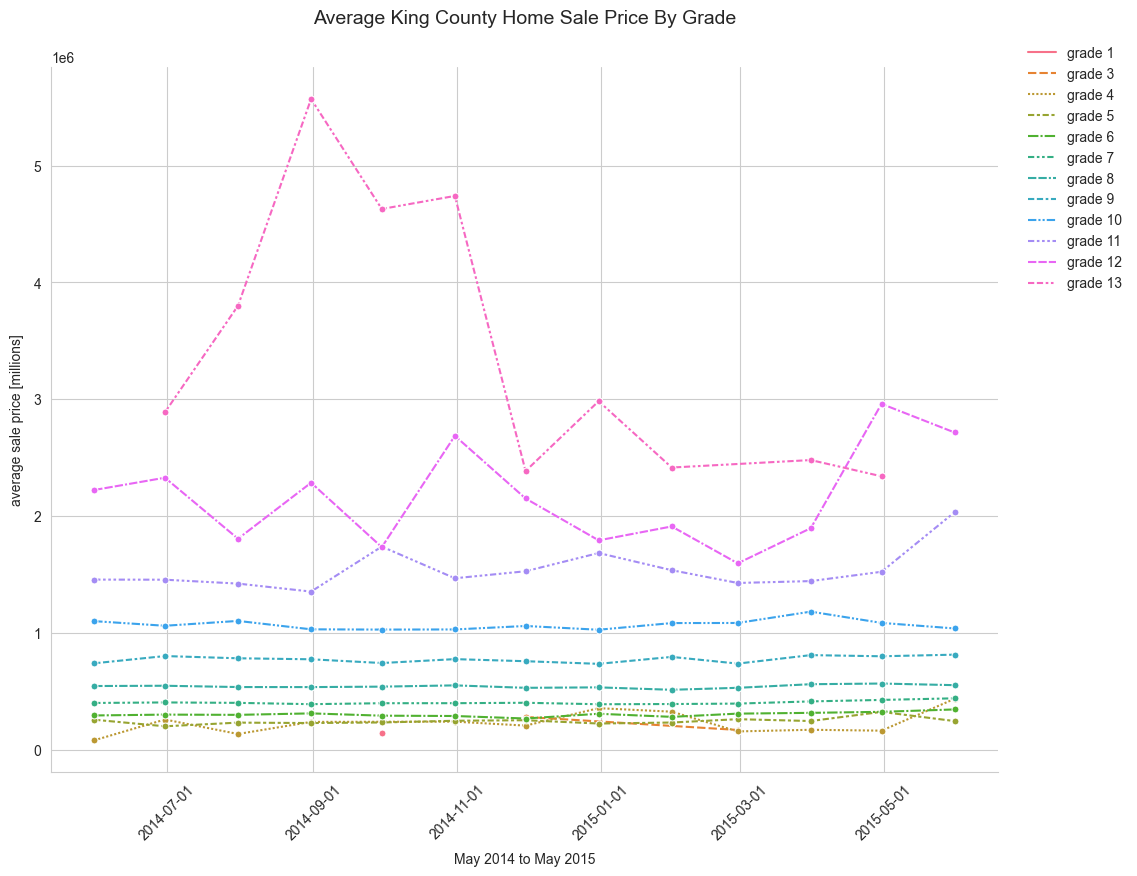

In [19]:
mean_price_by_grade_comb = get_mean_per_month(home_sales_df,'grade')
create_line_graph(mean_price_by_grade_comb)
# added to suppress tight layout warning
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight")

### What do we see from home prices when it relates to build grade?
The data looks exactly as we expected, with each jump in grade value, we see an increase in sale price. However, what I did not expect is you can clearly see the jump of average price between grades increases with each grade increment. So the higher quality the of build, especially in the 11-13 grade range, you start to see significant value spikes.

I'm curious though, why the giant spike in grade 13 in the month of September? Maybe another visualization can let us take a look better. I like the ***swarmplot***, let's take a look.

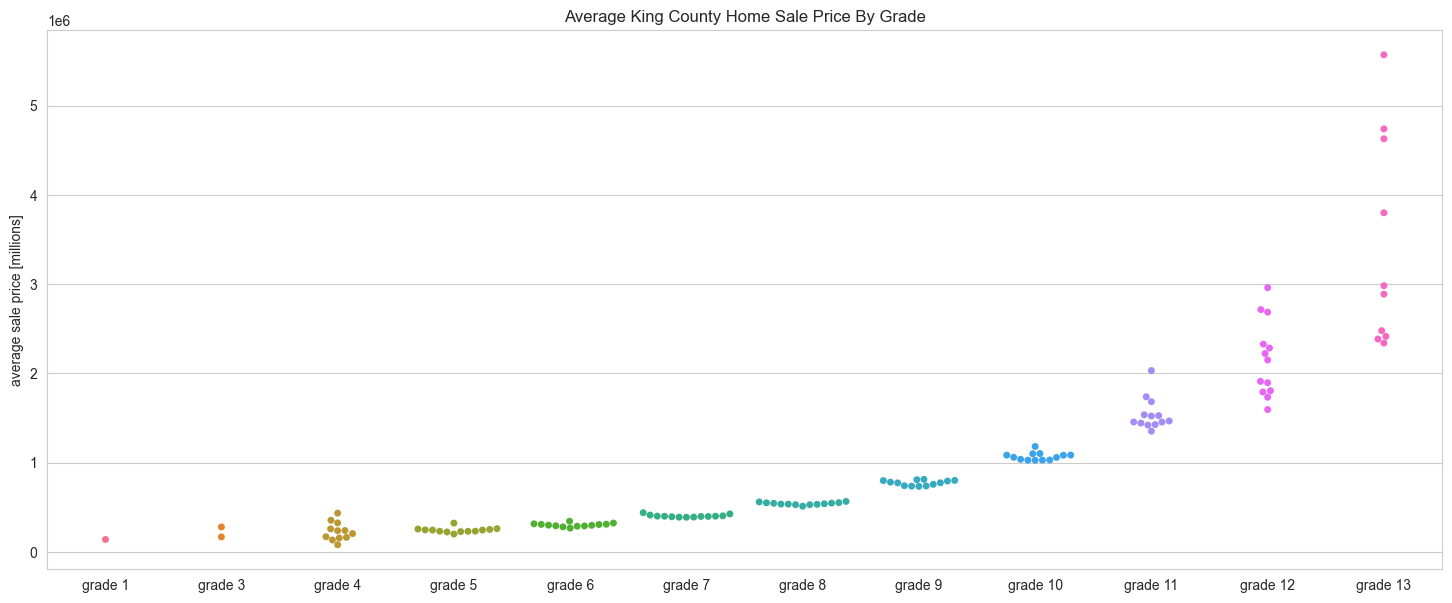

In [11]:
plt.close('all')
fig, ax = plt.subplots(figsize=(18,7))
sns.swarmplot(ax=ax, data=mean_price_by_grade_comb, s=5).set_title('Average King County Home Sale Price By Grade')
ax.set_ylabel('average sale price [millions]')
plt.show()

I really like the way the swarmplot let's us see how the data is spread out. Already we can see that mostly grades 1-10 are realitively clumped together, and regardless of month you're going to see a relatively steady price. Once we get to 11 and above, and especially 13, we can see the spread is much, much larger compared to the other grades. With how big of these outliers are, it seems to me that the spring/summer months look to have a greater impact on homes with build qualities above grade 10. I would like to have data over more years to explore this further.<br>

I mentioned before that grades 1-10 seem relatively unaffected, but I may have glossed over grade 4. Seems the home prices are not as steady over that grade. But, looks like there's an issue with the higher home prices at higher grades stretching the scale out. Let's normalize the data and take a look to see if we can get more detail on grade 4.

In [12]:
def normalize_data(data) -> pd.DataFrame:
    data_2_log = data.copy()
    for col_name in list(data.columns):
        data_2_log[col_name] = np.log(data_2_log[col_name])
        
    return data_2_log

In [13]:
def create_boxplot_by_grade(df):
    plt.close('all')
    fig, ax = plt.subplots(figsize=(11,7))
    sns.boxplot(df, ax=ax).set_title('Average King County Home Sale Price By Grade')
    ax.set_ylabel('log{average sale price}')
    
    return plt.show()

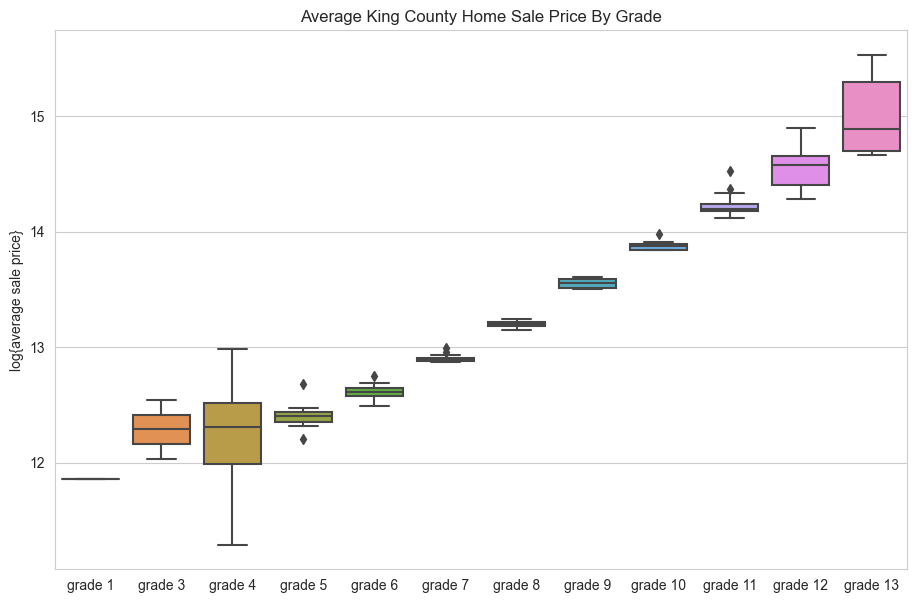

In [14]:
mean_price_by_grade_comb_norm = normalize_data(mean_price_by_grade_comb)
create_boxplot_by_grade(mean_price_by_grade_comb_norm)

It is much easier to see in the normalized data that grade 4 has the same, if not equal, of a spread to grade 13. Why this is?<br>

My theory would be that grade 4, according to the dataset publisher, is the first grade right above "falls short of build construction". Which means these homes could either be really great for their value or need a ton of work, lowering their value. To me it seems as though grade 4 is the most ambigious when being defined and has a lot of variety in the quality of homes which fall within it <br>

Another theory may be that this is where majority of "flipper" homes fall into. Lower average build grade, means structurely sound and mainly needs cosmetic work to do a flip. Due to that, there is high demand on something anyone can make some quick money on, so sometimes those prices will be high, and sometimes there is a lot of work to be done, thus no one wants to buy.

Just out of curiosity let's see what months the max and min were for grade 4 -->

In [15]:
mean_price_by_grade_comb_norm['grade 4'].idxmax()

Timestamp('2015-05-31 00:00:00')

In [16]:
mean_price_by_grade_comb_norm['grade 4'].idxmin()

Timestamp('2014-05-31 00:00:00')

Looks like both the max and min happened in May, once in 2014 (min) and once in 2015 (max). Unlike grade 13 where it seemed to spike in the month of September (end of summer), the grade 4 seems to spike independent on time of the year.

### Some extracurriculars
Just out of curiosity, I wanted to see how much waterfront affects home price. Let's see below:

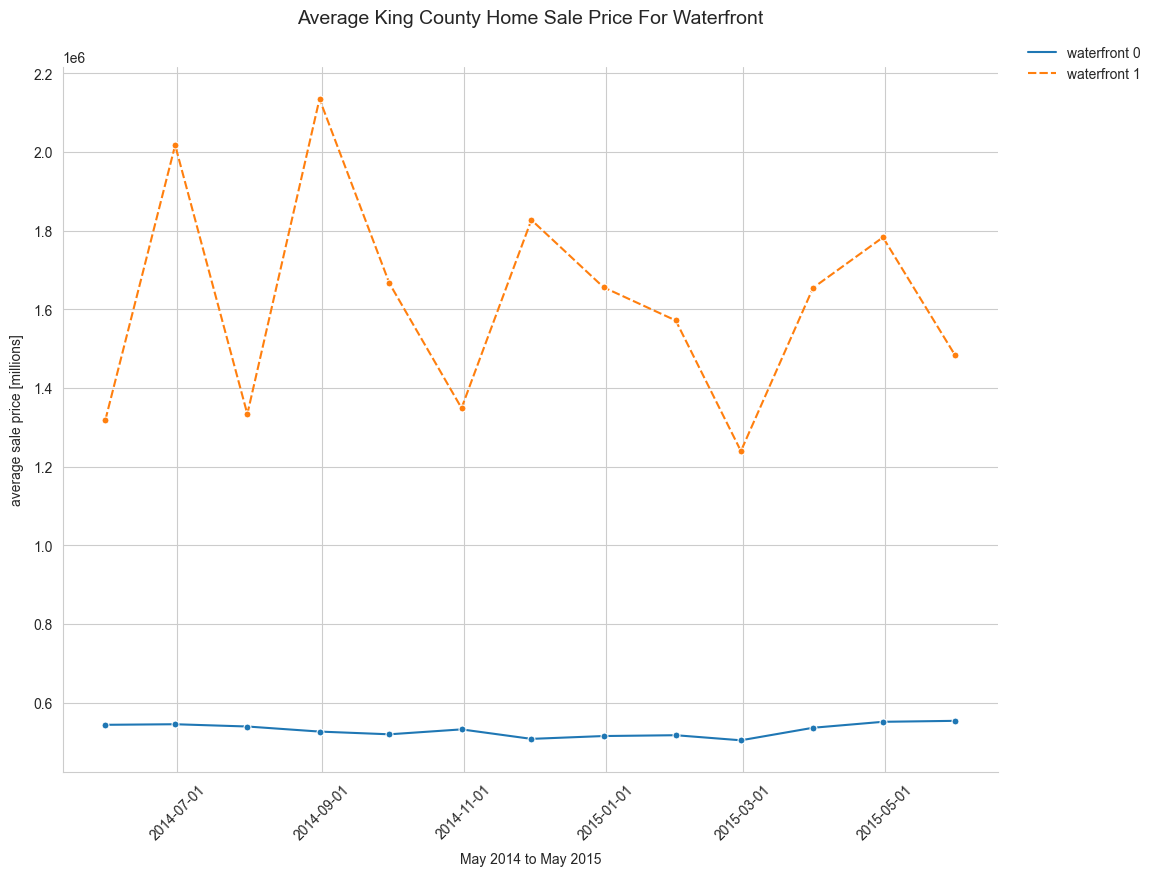

In [17]:
mean_price_by_waterfront_comb = get_mean_per_month(home_sales_df,'waterfront')
create_line_graph(mean_price_by_waterfront_comb)
# added to suppress tight layout warning
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight")

**...Looks like quite a bit!**